In [ ]:
from google.colab import drive
import pandas as pd

# Mounting Google Drive
drive.mount("/content/drive", force_remount=True)

# File path
file_path = "/content/drive/My Drive/Data_606_Capstone_Project"

# Loading Bus Breakdown CSV into DataFrame
df = pd.read_csv(f'{file_path}/Bus_Breakdown_and_Delays_20250603.csv')

Mounted at /content/drive


/tmp/ipython-input-2125264239.py:11: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{file_path}/Bus_Breakdown_and_Delays_20250603.csv')


Filtering the data for three School Years (SY) 2022-2023, 2023-2024, and 2024-2025

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder

#EDA Process

In [ ]:
#Filtering the data to only include the most recent 3 years after Covid-19
three_recent_SY_Yrs = ['2022-2023', '2023-2024', '2024-2025']
df = df[df['School_Year'].isin(three_recent_SY_Yrs)]

In [ ]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None) #Showing all columns
df.head()#this is how our dataset look like

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
58,2024-2025,1936521,Pre-K/EI,7165,3002A,Heavy Traffic,C912,09/13/2024 06:30:00 AM,09/13/2024 09:50:00 AM,Brooklyn,L & M BUS CORP.,46-60 Min,0,Yes,Yes,No,09/13/2024 09:50:00 AM,NaN,09/13/2024 03:00:11 PM,Running Late,Pre-K
95709,2022-2023,1738435,Special Ed AM Run,16388,K064,Heavy Traffic,"21468,21560,21907",09/12/2022 08:10:00 AM,09/12/2022 08:24:00 AM,Brooklyn,"BORO TRANSIT, INC.",16-30 Min,1,Yes,No,No,09/12/2022 08:24:00 AM,NaN,01/01/1900 12:00:00 AM,Running Late,School-Age
99766,2022-2023,1738438,Special Ed AM Run,9036,X184,Heavy Traffic,12486,09/12/2022 08:25:00 AM,09/12/2022 08:27:00 AM,Bronx,PIONEER TRANSPORTATION CORP,16-30 Min,8,No,No,No,09/12/2022 08:27:00 AM,NaN,01/01/1900 12:00:00 AM,Running Late,School-Age
111645,2022-2023,1742273,General Ed AM Run,405,R1218,Heavy Traffic,31044,09/21/2022 05:17:00 AM,09/21/2022 05:17:00 AM,Staten Island,PIONEER TRANSPORTATION CORP,16-30 Min,0,No,No,No,09/21/2022 05:17:00 AM,NaN,01/01/1900 12:00:00 AM,Running Late,School-Age
112003,2022-2023,1743058,Special Ed AM Run,1001,L343,Other,"20685,21461",09/22/2022 06:15:00 AM,09/22/2022 06:21:00 AM,Brooklyn,PRIDE TRANSPORTATION (SCH AGE),61-90 Min,0,No,No,No,09/22/2022 06:21:00 AM,NaN,09/22/2022 06:24:15 AM,Running Late,School-Age


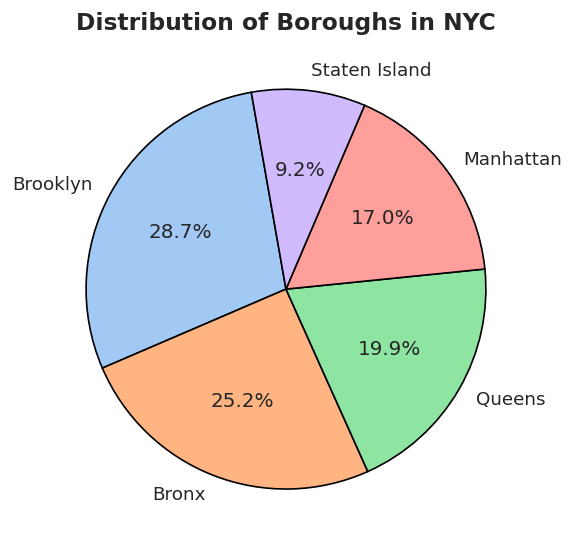

In [ ]:
#Distribution of Boroughs in NYC
df.rename(columns={'Boro': 'Borough'}, inplace=True)
not_the_city= ['Nassau County', 'Westchester', 'New Jersey', 'All Boroughs', 'Rockland County', 'Connecticut']
df = df[~df['Borough'].isin(not_the_city)]

borough_counts = df['Borough'].value_counts()

colors = sns.color_palette('pastel')[0:len(borough_counts)]
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(
    borough_counts,
    labels=borough_counts.index,
    autopct='%1.1f%%',
    startangle=100,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Boroughs in NYC', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

This right here takes the column and sort the value for the num of students that'll realistically be on the bus. The number we're focusing on according to google is 72 students that can fit on a school bus(YELLOW BUS) in NYC.

In [ ]:
df['Run_Type']

,Run_Type
58,Pre-K/EI
95709,Special Ed AM Run
99766,Special Ed AM Run
111645,General Ed AM Run
112003,Special Ed AM Run
...,...
748476,Special Ed PM Run
748477,General Ed PM Run
748478,General Ed PM Run
748480,Special Ed AM Run


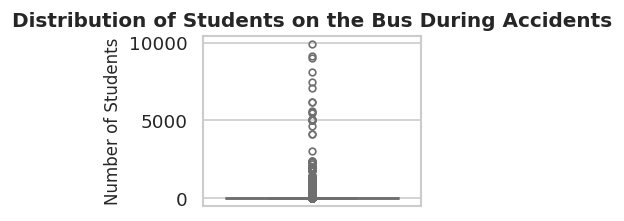

In [ ]:
#a visualization to show the outliers

sns.set(style="whitegrid")
plt.figure(figsize=(3, 2), dpi=120)
sns.boxplot(
    y=df['Number_Of_Students_On_The_Bus'],
    color='skyblue',
    linewidth=1.5,
    fliersize=4
)

plt.title('Distribution of Students on the Bus During Accidents', fontsize=12, fontweight='bold')
plt.ylabel('Number of Students', fontsize=10)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
#Before I replaced the rows with 0, I wanted to see how many rows were over our target. Based off of this numbr, I realised it's better to get rid of the 105 columns.
(df['Number_Of_Students_On_The_Bus'] > 72).sum()

np.int64(105)

In [ ]:
#Now what Im doing is im filtering the dataframe for us to not see the 105 columns that are over the count 72
df = df[df['Number_Of_Students_On_The_Bus'] <= 72]

In [ ]:
#This is just a quick sort check
df['Number_Of_Students_On_The_Bus'].sort_values(ascending=False)

,Number_Of_Students_On_The_Bus
621754,69
611329,62
577936,55
695579,53
428939,50
...,...
608899,0
608900,0
399989,0
608905,0


In [ ]:
df.describe().round(0)

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,228503.0,228503.0
mean,1869364.0,2.0
std,78570.0,4.0
min,1736696.0,0.0
25%,1799636.0,0.0
50%,1866269.0,0.0
75%,1941086.0,2.0
max,2001347.0,69.0


In [ ]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,7
Bus_No,1
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Borough,68


These column are not too pertinent becasue according to the data dictionary it is: "Some reports of bus breakdowns or delays originate from calls to the OPT Customer Service line who records incidents. When this happens, the record will have the Incident reference number." More importantly, it contains too many missing values.

In [ ]:
#dropping records for where there is null values
df.dropna(subset=['Borough','Run_Type','Bus_No',
                  'Route_Number', 'Reason'], inplace=True)

In [ ]:
#counting the dataframe
df.count()

,0
School_Year,228427
Busbreakdown_ID,228427
Run_Type,228427
Bus_No,228427
Route_Number,228427
Reason,228427
Schools_Serviced,228427
Occurred_On,228427
Created_On,228427
Borough,228427


In [ ]:
df.describe().round(1)

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,228427.0,228427.0
mean,1869371.3,1.8
std,78575.6,3.8
min,1736696.0,0.0
25%,1799630.5,0.0
50%,1866285.0,0.0
75%,1941100.5,2.0
max,2001347.0,69.0


After dropping the null values, the dataset still remains substantially large at 689K records, which is quite sizable.

In [ ]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Borough,object


##Cleaning the How Delayed Column

In [ ]:
#Standardized the How_Long_Delayed column and convert everything to minute
import re
import numpy as np

def standardize_delay_time(text):
    if pd.isna(text) or text in ['?', '??', '???', '????', 'unknown', 'unk', 'UNSURE', 'TBD', 'N/A', 'NI0634', 'NI0627', 'NI0933', 'NI932', 'NI2134', 'NI0306']:
        return np.nan

    original = str(text).strip()

    # Clean the text
    cleaned = original.lower()
    cleaned = re.sub(r'[^a-z0-9\s/.-]', '', cleaned)  # Remove special chars except those used in ranges/dates
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()

    # Handle date-like entries (e.g., "15-Oct")
    if re.match(r'\d{1,2}-[a-z]{3}', cleaned):
        return np.nan

    # Handle special cases
    special_cases = {
        'half hour': 30,
        'halfhour': 30,
        '1/2 hour': 30,
        '1/2hour': 30,
        '1/2 hr': 30,
        'one hour': 60,
        'hour': 60,
        '1 hour': 60,
        '1hr': 60,
        '1 hrs': 60,
        '1h': 60,
        '1.5 hrs': 90,
        '1.5 hour': 90,
        '1 1/2 hr': 90,
        '1hr30min': 90,
        '1 hour 30min': 90,
        '1hr 30min': 90,
        '1hr 45min': 105,
        '1hr20min': 80,
        '1hr40min': 100,
        '2hr': 120,
        '2 hrs': 120,
        '2 hours': 120,
        '2hrs': 120,
        '3 hr': 180,
        '3 hrs': 180,
        '3 hours': 180,
        '4 hours': 240
    }

    for case, minutes in special_cases.items():
        if case in cleaned:
            return minutes

    # Extract all numbers
    numbers = re.findall(r'\d+', cleaned)
    if not numbers:
        return np.nan

    # Handle ranges (e.g., 15-20, 10/15) and convert to Avg
    if '-' in cleaned or '/' in cleaned or 'to' in cleaned:
        try:
            if len(numbers) >= 2:
                num1, num2 = int(numbers[0]), int(numbers[1])
                return (num1 + num2) / 2  # Return midpoint
            else:
                return int(numbers[0])
        except:
            return np.nan

    # Handle simple numeric values
    if len(numbers) == 1 and not any(x in cleaned for x in ['hr', 'hour', 'min', 'mns', 'mins', 'm']):
        return int(numbers[0])

    # Handle time units
    total_minutes = 0

    # Hours first
    hour_matches = re.findall(r'(\d+)\s*(?:hr|hour|h|ho)', cleaned)
    for match in hour_matches:
        total_minutes += int(match) * 60

    # Then minutes
    min_matches = re.findall(r'(\d+)\s*(?:min|mins|mns|m|mn|mi|minutes|minute|minut|minu|minuets|minites|minuts|minuites|minnutes|minte|minuate|minuste|minuets|minuites|minuets|minuites|minnutes|minte|minuate|minuste|minuets|minuites)', cleaned)
    for match in min_matches:
        total_minutes += int(match)

    # If we found any time units, return the total
    if hour_matches or min_matches:
        return total_minutes if total_minutes > 0 else np.nan

    # If no units found but we have numbers, assume minutes
    if numbers:
        return int(numbers[0])

    return np.nan

# Apply the function to column
df['Delay_Minutes'] = df['How_Long_Delayed'].apply(standardize_delay_time)

# For values that seem too large to be minutes (e.g., > 300), we make them blank and then mark them for breakdown instead of delay
df.loc[df['Delay_Minutes'] > 300, 'Delay_Minutes'] = np.nan

In [ ]:
#count of 'Delay_Minutes' where values are null

df['Delay_Minutes'].isnull().sum()

np.int64(12380)

In [ ]:
# Dropping rows where 'Delay_Minutes' is 0
df.drop(df[df['Delay_Minutes'] == 0].index, inplace=True)

# Marking  'Breakdown_or_Running_Late' as "Breakdown" where 'Delay_Minutes' is Null
df.loc[df['Delay_Minutes'].isnull(), 'Breakdown_or_Running_Late'] = 'Breakdown'

In [ ]:
# getting count of both breakdown and running late
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,216047
Breakdown,12380


In [ ]:
df['Delay_Minutes'].describe().round(1)

,Delay_Minutes
count,216047.0
mean,41.1
std,22.9
min,7.5
25%,23.0
50%,38.0
75%,53.0
max,75.5


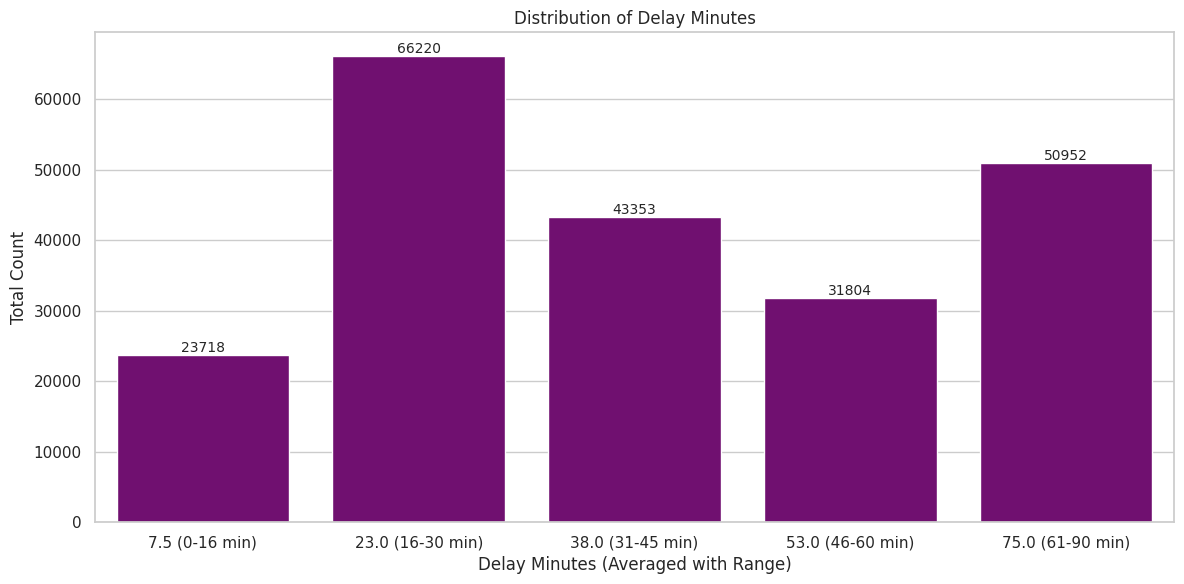

In [ ]:
# Distribution of Delay Minutes by creating bins first
bins = [0, 16, 30, 45, 60, 90]
avg_labels = [7.5, 23.0, 38.0, 53.0, 75.0]
range_labels = ['0-16 min', '16-30 min', '31-45 min', '46-60 min', '61-90 min']
display_labels = [f"{avg} ({rng})" for avg, rng in zip(avg_labels, range_labels)]
df['Delay_Bin'] = pd.cut(df['Delay_Minutes'], bins=bins, labels=display_labels, include_lowest=True)

# Counting occurrences in each bin
delay_counts = df['Delay_Bin'].value_counts().reindex(display_labels)

#Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=delay_counts.index,
    y=delay_counts.values,
    color='purple'
)

for bar, count in zip(ax.patches, delay_counts.values):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(count)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Distribution of Delay Minutes')
plt.xlabel('Delay Minutes (Averaged with Range)')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

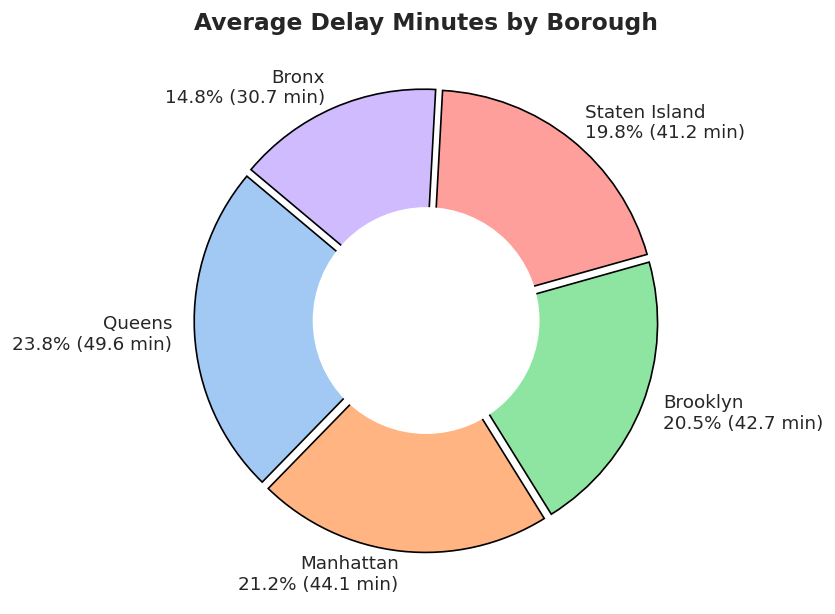

In [ ]:
# Average Delay Minutes by Borough
df.rename(columns={'Boro': 'Borough'}, inplace=True)
not_the_city = ['Nassau County', 'Westchester', 'New Jersey', 'All Boroughs', 'Rockland County', 'Connecticut']
df = df[~df['Borough'].isin(not_the_city)]

# average delay per borough
borough_avg_delay = df.groupby('Borough')['Delay_Minutes'].mean().sort_values(ascending=False)
total_avg_sum = borough_avg_delay.sum()

# labels
labels = [
    f"{borough}\n{(avg/total_avg_sum)*100:.1f}% ({avg:.1f} min)"
    for borough, avg in borough_avg_delay.items()
]

# chart
colors = sns.color_palette('pastel')[0:len(borough_avg_delay)]
explode = [0.03] * len(borough_avg_delay)

plt.figure(figsize=(7, 7), dpi=120)
wedges, texts = plt.pie(
    borough_avg_delay,
    labels=labels,
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    explode=explode
)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)

# plot
plt.title('Average Delay Minutes by Borough', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Cleaning the Route Number

In [ ]:
# Ensure Route_Number is string
df['Route_Number'] = df['Route_Number'].astype(str).str.strip()

# Replace exact '0' or '0.0' with NaN BEFORE cleaning
df['Route_Number'] = df['Route_Number'].replace(['0', '0.0'], np.nan)

# Function to clean route numbers
def clean_route(route):
    if pd.isna(route):
        return None

    route_str = str(route).strip().upper()

    # Remove special characters like #, :, spaces
    route_str = re.sub(r'[^A-Z0-9]', '', route_str)

    # Remove values that are still empty or zero after cleaning
    if route_str in {"", "0", "0.0"}:
        return None

    # Remove time formats like 08:15AM, 7:00, etc.
    if re.match(r'^\d{1,2}:\d{2}(:\d{2})?(AM|PM)?$', route_str, flags=re.IGNORECASE):
        return None

    # Remove values like '8AM' or '10PM'
    if re.search(r'(AM|PM)', route_str, flags=re.IGNORECASE):
        return None

    # Remove leading zeros from numeric strings
    route_str = re.sub(r'^0+', '', route_str)

    return route_str

# Apply the cleaning function
df['Route_Number_Clean'] = df['Route_Number'].apply(clean_route)

In [ ]:
df['Route_Number_Clean'].value_counts()

,count
Route_Number_Clean,
2,643
1,472
Y111,422
K080,354
Y206,337
...,...
B0917W,1
K9970,1
1E,1


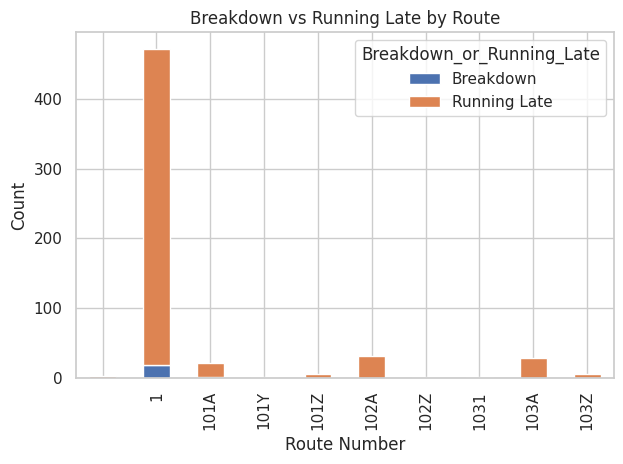

In [ ]:
#This groups each route by incident type and counts how many were breakdowns vs just running late.
status_by_route = df.groupby(['Route_Number_Clean', 'Breakdown_or_Running_Late']).size().unstack(fill_value=0)
status_by_route.head(10).plot(kind='bar', stacked=True, title='Breakdown vs Running Late by Route')
plt.xlabel('Route Number')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

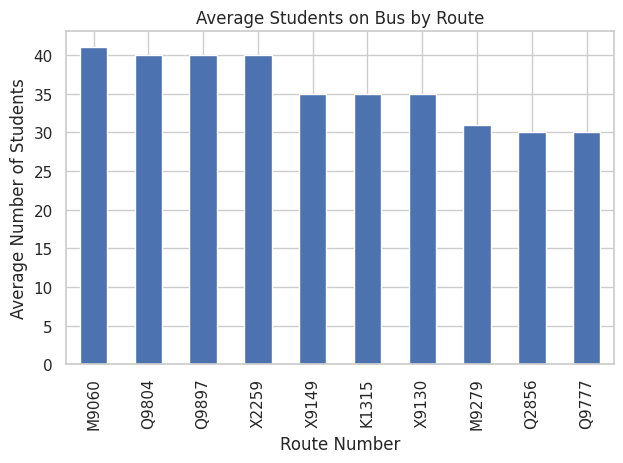

In [ ]:
#This calculates how many students are typically on the bus for each route. You see which routes carry the most kids.
avg_students = df.groupby('Route_Number_Clean')['Number_Of_Students_On_The_Bus'].mean().sort_values(ascending=False).head(10)
avg_students.plot(kind='bar', title='Average Students on Bus by Route')
plt.xlabel('Route Number')
plt.ylabel('Average Number of Students')
plt.tight_layout()
plt.show()

## Cleaning the Company Names

In [ ]:
# Define list of invalid values to exclude
invalid_names = ['1967', '1992', '1997', 'COMPANY', '`', 'PL1800', 'IY', 'BUS COMPANY', 'MS', 'MR', 'GUILLEN RODRIGUEZ']

# Filter out
df = df[~df['Bus_Company_Name'].isin(invalid_names)]

In [ ]:
import re
import unicodedata

def normalize_company(name):
    name = str(name)
    name = unicodedata.normalize("NFKD", name)
    name = re.sub(r'[^\w\s&.-]', '', name)      # Remove special chars except useful punctuation
    name = re.sub(r'\s+', ' ', name).strip()    # Collapse spaces
    return name.upper()

# Apply normalization
df['Bus_Company_Name'] = df['Bus_Company_Name'].apply(normalize_company)

In [ ]:
# Extract possible alpha+number codes at the end (B2192, B2, etc.)
df['Company_Code'] = df['Bus_Company_Name'].str.extract(r'([A-Z]\d{1,4})')

# Rule: Keep codes only if 4 digits (e.g., B2192), remove if short like B2
df['Company_Code'] = df['Company_Code'].apply(lambda x: x if (isinstance(x, str) and re.match(r'[A-Z]\d{4}$', x)) else None)

# Remove any suffix codes from the company name (even short ones)
df['Bus_Company_Name'] = df['Bus_Company_Name'].str.replace(r'\s*[A-Z]\d{1,4}$', '', regex=True).str.strip()

# Re-normalize after removal
df['Bus_Company_Name'] = df['Bus_Company_Name'].apply(normalize_company)

In [ ]:
standardize_map = {
    # CHILDREN
    'CHILDREN`S TRANS INC': 'CHILDREN TRANSIT INC',
    'CHILDREN`S TRANS INC. (B2321)': 'CHILDREN TRANSIT INC',
    'CHILDRENS TRANS INC': 'CHILDREN TRANSIT INC',
    'CHILDRENS TRANS INC.': 'CHILDREN TRANSIT INC',

    # CONSOLIDATED BUS
    'CONSOLIDATED BUS TRANS I': 'CONSOLIDATED BUS TRANSIT INC',
    'CONSOLIDATED BUS TRANS INC': 'CONSOLIDATED BUS TRANSIT INC',
    'CONSOLIDATED BUS TRANSIT INC': 'CONSOLIDATED BUS TRANSIT INC',
    'CONSOLIDATED BUS TRANS. I': 'CONSOLIDATED BUS TRANSIT INC',
    'CONSOLIDATED BUS TRANS. INC.': 'CONSOLIDATED BUS TRANSIT INC',
    'CONSOLIDATED BUS TRANSIT INC.': 'CONSOLIDATED BUS TRANSIT INC',

    # DON THOMAS
    'DON THOMAS BUSES, INC.': 'DON THOMAS BUSES INC',
    'DON THOMAS BUSES, INC. (B2321)': 'DON THOMAS BUSES INC',
    'DON THOMAS BUSES INC.': 'DON THOMAS BUSES INC',

    # FIRST STEPS
    'FIRST STEPS TRANS INC. (B2192)': 'FIRST STEPS TRANSIT INC',
    'FIRST STEPS TRANS, INC': 'FIRST STEPS TRANSIT INC',
    'FIRST STEPS TRANSP INC': 'FIRST STEPS TRANSIT INC',
    'FIRST STEPS TRANSP INC.': 'FIRST STEPS TRANSIT INC',
    'FIRST STEPS TRANS INC': 'FIRST STEPS TRANSIT INC',
    'FIRST STEPS TRANS INC.': 'FIRST STEPS TRANSIT INC',

    # LORINDA
    'LORINDA ENT LTD': 'LORINDA ENTERPRISES LTD',
    'LORINDA ENTERPRISES LTD': 'LORINDA ENTERPRISES LTD',
    'LORINDA ENTERPRISES LTD.': 'LORINDA ENTERPRISES LTD',

    # MJT
    'MJT BUS': 'MJT BUS COMPANY INC',
    'MJT BUS COMPANY INC': 'MJT BUS COMPANY INC',

    # MONTAUK
    'MONTAUK STUDENT TRANS IN': 'MONTAUK STUDENT TRANS INC',
    'MONTAUK STUDENT TRANS INC': 'MONTAUK STUDENT TRANS INC',

    # SMART PICK
    'SMART PICK': 'SMART PICK INC',
    'SMART PICK INC': 'SMART PICK INC',

    # THIRD AVENUE
    'THIRD AVENUE TRANSIT': 'THIRD AVENUE TRANSIT INC',
    'THIRD AVENUE TRANSIT INC': 'THIRD AVENUE TRANSIT INC',

    # TWENTY FIRST AVE
    'TWENTY FIRST AV TRANSP B': 'TWENTY FIRST AV TRANSIT',
    'TWENTY FIRST AV TRANSIT': 'TWENTY FIRST AV TRANSIT',

    # LEESEL
    'LEESEL TRANSP CORP': 'LEESEL TRANSPORTATION CORP',
    'LEESEL TRANSPORTATION CORP (B2192)': 'LEESEL TRANSPORTATION CORP',
    'LEESEL TRANSPORTATION COR': 'LEESEL TRANSPORTATION CORP',

    # PHILLIP
    'PHILLIPS BUS SERVICE': 'PHILLIP BUS SERVICE INC',
    'Phillip Bus Service, Inc.E': 'PHILLIP BUS SERVICE INC',
    'PHILLIPBUSSERVICE': 'PHILLIP BUS SERVICE INC',
    'PHILLIP BUS CORP (B2192)': 'PHILLIP BUS SERVICE INC',
    'PHILLIPBUSSERVICE': 'PHILLIP BUS SERVICE INC',
    'PHILLIPSBUSSERVICE': 'PHILLIP BUS SERVICE INC',
    'PHILLIP BUS CORP': 'PHILLIP BUS SERVICE INC',
    'PHILLIP BUS SERVICE INC.': 'PHILLIP BUS SERVICE INC',

    # G.V.C.
    'G.V.C. LTD. (B2192)': 'G.V.C. LTD',
    'G.V.C., LTD.': 'G.V.C. LTD',
    'GVC LTD': 'G.V.C. LTD',
    'G.V.C. LTD.': 'G.V.C. LTD',

    # RELIANT
    'RELIANT TRANS INC': 'RELIANT TRANSPORTATION INC',
    'RELIANT TRANSPORTATION INC': 'RELIANT TRANSPORTATION INC',

    # CAREFUL
    'CAREFUL BUS': 'CAREFUL BUS SERVICE INC',
    'CAREFUL BUS SERVICE INC': 'CAREFUL BUS SERVICE INC',

    # PRIDE
    'PRIDE TRANSPORTATION (SCH': 'PRIDE TRANSPORTATION INC',
    'PRIDE TRANSPORTATION (SCH AGE)': 'PRIDE TRANSPORTATION INC',
    'PRIDE TRANSPORTATION SCH': 'PRIDE TRANSPORTATION INC',
    'PRIDE TRANSPORTATION SCH AGE': 'PRIDE TRANSPORTATION INC',

    # THOMAS
    'THOMAS BUSES, INC. (B2321)': 'THOMAS BUSES INC',
    'THOMAS BUSES INC': 'THOMAS BUSES INC',
    'THOMAS BUSES INC (B2192)': 'THOMAS BUSES INC',
    'THOMAS BUSES, INC. (B2321': 'THOMAS BUSES INC',
    'THOMAS BUSES INC.': 'THOMAS BUSES INC',

    # ALINA
    'ALINA': 'ALINA SERVICES CORP',
    'ALINA SERVICES CORP': 'ALINA SERVICES CORP',
    'Alina Services CORP.': 'ALINA SERVICES CORP',
    'ALINA SERVICES CORP.': 'ALINA SERVICES CORP',

    # ALL AMERICAN SCHOOL BUS
    'ALL AMERICAN SCHOOL BUS C': 'ALL AMERICAN SCHOOL BUS COMPANY',
    'ALL AMERICAN SCHOOL BUS CORP.': 'ALL AMERICAN SCHOOL BUS COMPANY',
    'ALL AMERICAN SCHOOL BUS COMPANY': 'ALL AMERICAN SCHOOL BUS COMPANY',

    # SELBY
    'SELBY TRANS CORP': 'SELBY TRANSPORTATION CORP',
    'SELBY TRANSPORTATION CORP': 'SELBY TRANSPORTATION CORP',
    'SELBY TRANSPORTATION': 'SELBY TRANSPORTATION CORP',

    # L & M
    'L & M BUS CORP.': 'L & M BUS CORP',
    'L & M BUS CORP (A)': 'L & M BUS CORP',
    'L & M BUS CORP': 'L & M BUS CORP',
    'L & M BUS CORP A': 'L & M BUS CORP',

    # PIONEER
    'PIONEER TRANSPORTATION CO': 'PIONEER TRANSPORTATION CORP',
    'PIONEER TRANSPORTATION CORP': 'PIONEER TRANSPORTATION CORP',

    # Additional companies - normalize punctuation
    'ALL COUNTY BUS LLC': 'ALL COUNTY BUS LLC',
    'ALLIED TRANSIT CORP.': 'ALLIED TRANSIT CORP',
    'ANOTHER RIDE INC.': 'ANOTHER RIDE INC',
    'B & F SKILLED INC.': 'B & F SKILLED INC',
    'BOBBYS BUS CO. INC.': 'BOBBYS BUS CO INC',
    'BORO TRANSIT INC.': 'BORO TRANSIT INC',
    'EMPIRE CHARTER SERVICE INC': 'EMPIRE CHARTER SERVICE INC',
    'EMPIRE STATE BUS CORP.': 'EMPIRE STATE BUS CORP',
    'GRANDPAS BUS CO. INC.': 'GRANDPAS BUS CO INC',
    'HOYT TRANSPORTATION CORP.': 'HOYT TRANSPORTATION CORP',
    'I & Y TRANSIT CORP': 'I & Y TRANSIT CORP',
    'IC BUS INC.': 'IC BUS INC',
    'JOFAZ TRANSPORTATION INC.': 'JOFAZ TRANSPORTATION INC',
    'LITTLE LINDA BUS CO.INC.': 'LITTLE LINDA BUS CO INC',
    'LITTLE LISA BUS CO. INC.': 'LITTLE LISA BUS CO INC',
    'LITTLE RICHIE BUS SERVICE': 'LITTLE RICHIE BUS SERVICE',
    'LOGAN BUS COMPANY INC.': 'LOGAN BUS COMPANY INC',
    'LOGAN TRANSPORTATION SYSTEMS': 'LOGAN TRANSPORTATION SYSTEMS',
    'LORISSA BUS SERVICE INC.': 'LORISSA BUS SERVICE INC',
    'MAR-CAN TRANSPORT CO. INC': 'MAR-CAN TRANSPORT CO INC',
    'NYC SCHOOL BUS UMBRELLA SERVICES': 'NYC SCHOOL BUS UMBRELLA SERVICES',
    'PENNY TRANSPORTATION': 'PENNY TRANSPORTATION',
    'QUALITY TRANSPORTATION CORP.': 'QUALITY TRANSPORTATION CORP',
    'SNT BUS INC': 'SNT BUS INC',
    'VAN TRANS LLC': 'VAN TRANS LLC',
    'VINNYS BUS SERVICES': 'VINNYS BUS SERVICES',
    'Y & M TRANSIT CORP': 'Y & M TRANSIT CORP',
}

# Apply map
df['Bus_Company_Name'] = df['Bus_Company_Name'].replace(standardize_map)

In [ ]:
df['Bus_Company_Name'] = df['Bus_Company_Name'].str.upper()

In [ ]:
#dropping the 'Incident_Number' and 'Schools_Serviced' columns
df.drop(['Incident_Number', 'Schools_Serviced', 'Bus_No', 'Company_Code', 'Informed_On','Last_Updated_On','Created_On'], axis=1, inplace=True)

<Axes: title={'center': 'Top 10 Companies by Incidents'}, ylabel='Bus_Company_Name'>

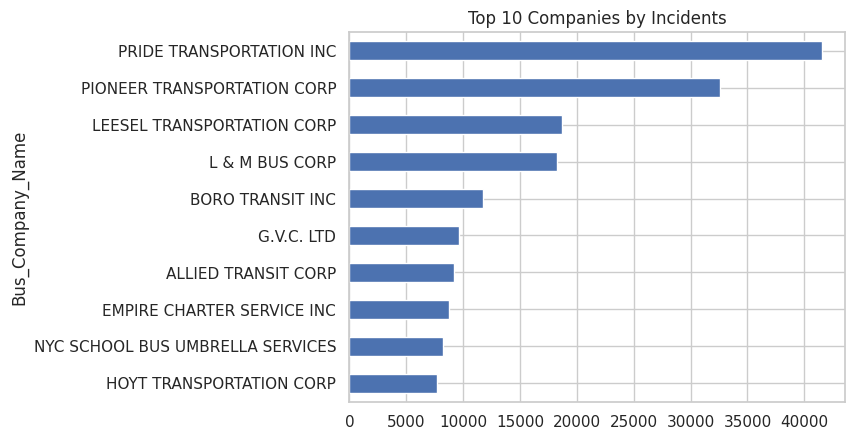

In [ ]:
#showing the Bus_Company_Name value_counts ascending
df['Bus_Company_Name'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', title='Top 10 Companies by Incidents')

Understanding the bus companies. Ensuring that there are no duplicates in the values

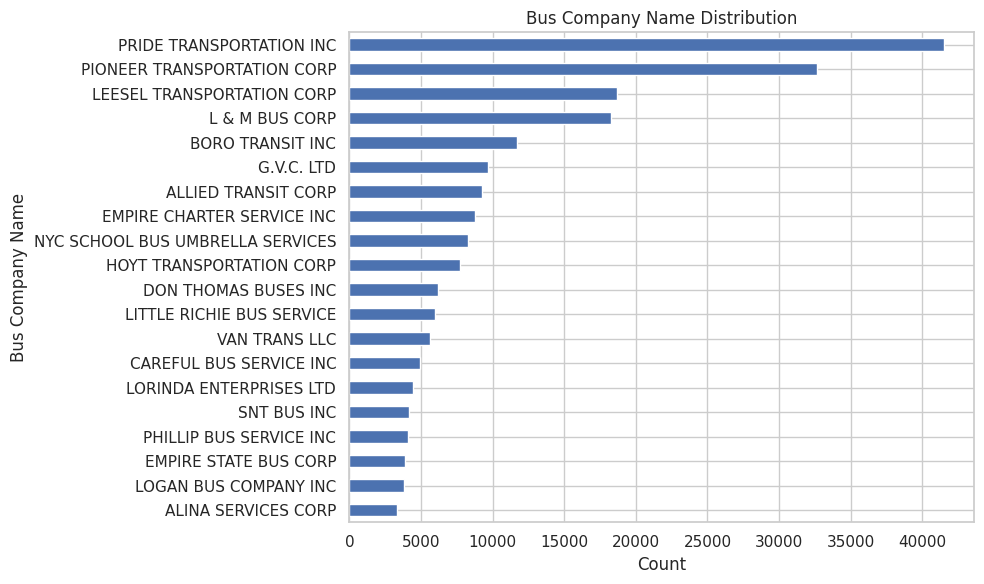

In [ ]:
data = df['Bus_Company_Name'].value_counts().head(20).sort_values()
data.plot(kind='barh', figsize=(10, 6))
plt.title('Bus Company Name Distribution')
plt.xlabel('Count')
plt.ylabel('Bus Company Name')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Breakdown vs Running Late'}, xlabel='Breakdown_or_Running_Late'>

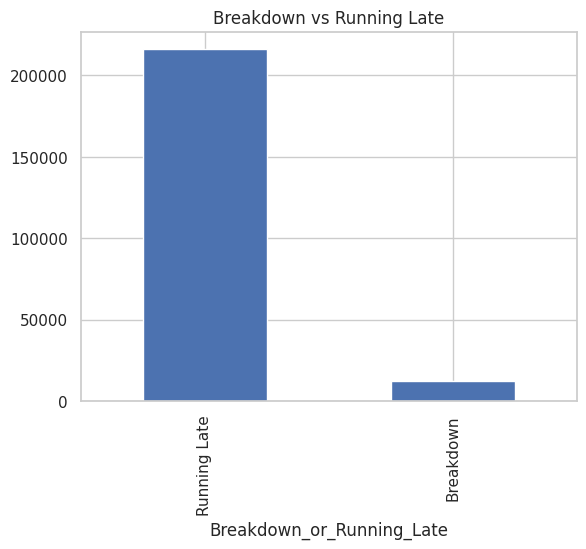

In [ ]:
df['Breakdown_or_Running_Late'].value_counts().plot(kind='bar', title='Breakdown vs Running Late')

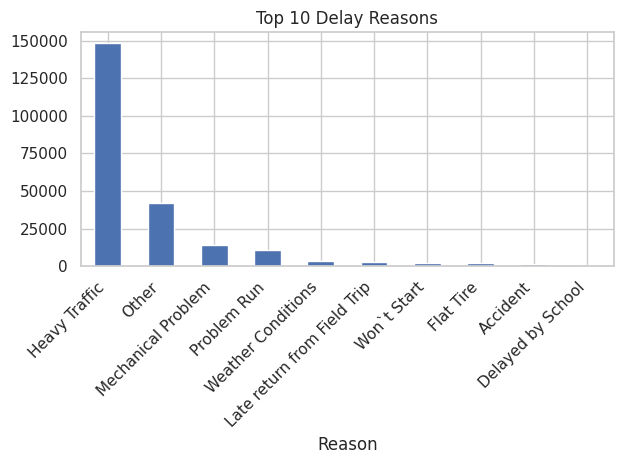

In [ ]:
df['Reason'].value_counts().head(10).plot(kind='bar', title='Top 10 Delay Reasons')
plt.xticks(rotation=45, ha='right')   # rotate x labels 45° and right-align
plt.tight_layout()
plt.show()

According to the dataset data dictionary category "Other" means: "to be selected by the reporting bus vendor when the delay cannot be classified within the available categories"

In [ ]:
df.shape

(228427, 18)

Even after extensive cleaning and standardization, the dataset remains substantial in size, with more than 228K records.

Adjusting Borough information. Since the data set includes data from New York State (City + Counties), we will only focus on New York City. This means removing the counties from the dataset.

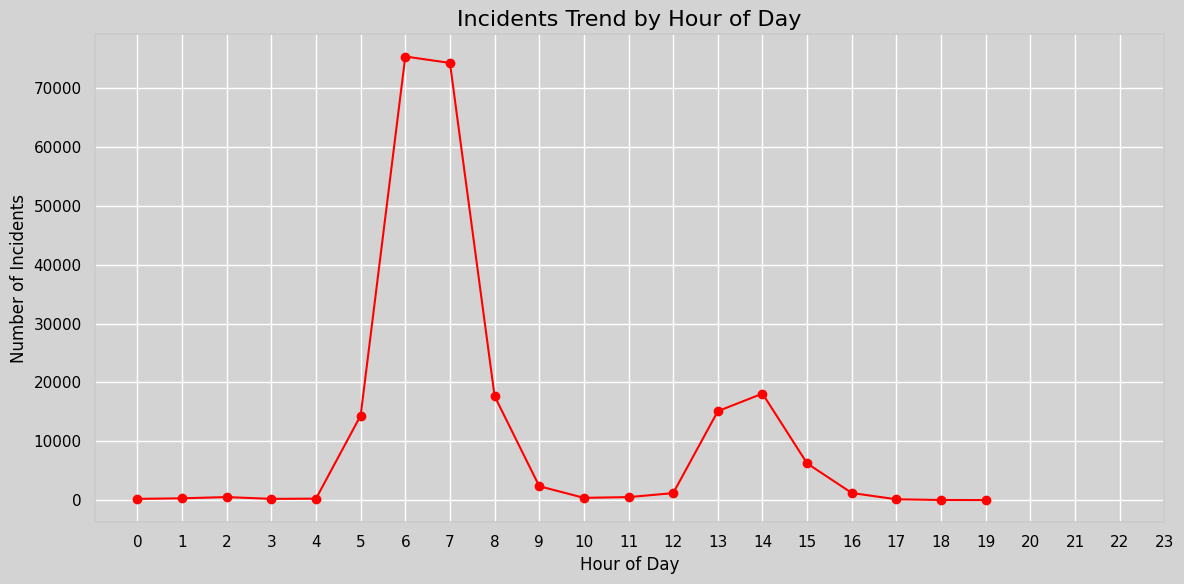

In [ ]:
#Incidents Trend by Hour of Day
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'], errors='coerce')
military_hrs = df['Occurred_On'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(12, 6), facecolor='lightgray')
ax = plt.gca()
ax.set_facecolor('lightgray')
plt.plot(military_hrs.index, military_hrs.values, marker='o', linestyle='-', color='Red')
plt.title('Incidents Trend by Hour of Day', fontsize=16, color='black')
plt.xlabel('Hour of Day', fontsize=12, color='black')
plt.ylabel('Number of Incidents', fontsize=12, color='black')
plt.xticks(range(0, 24), color='black')
plt.yticks(color='black')
plt.grid(True, color='white')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("cleaned_dataset.csv", index=False)

In [ ]:
df = df.loc[:, ~df.columns.isin(['Delay_Bin'])]

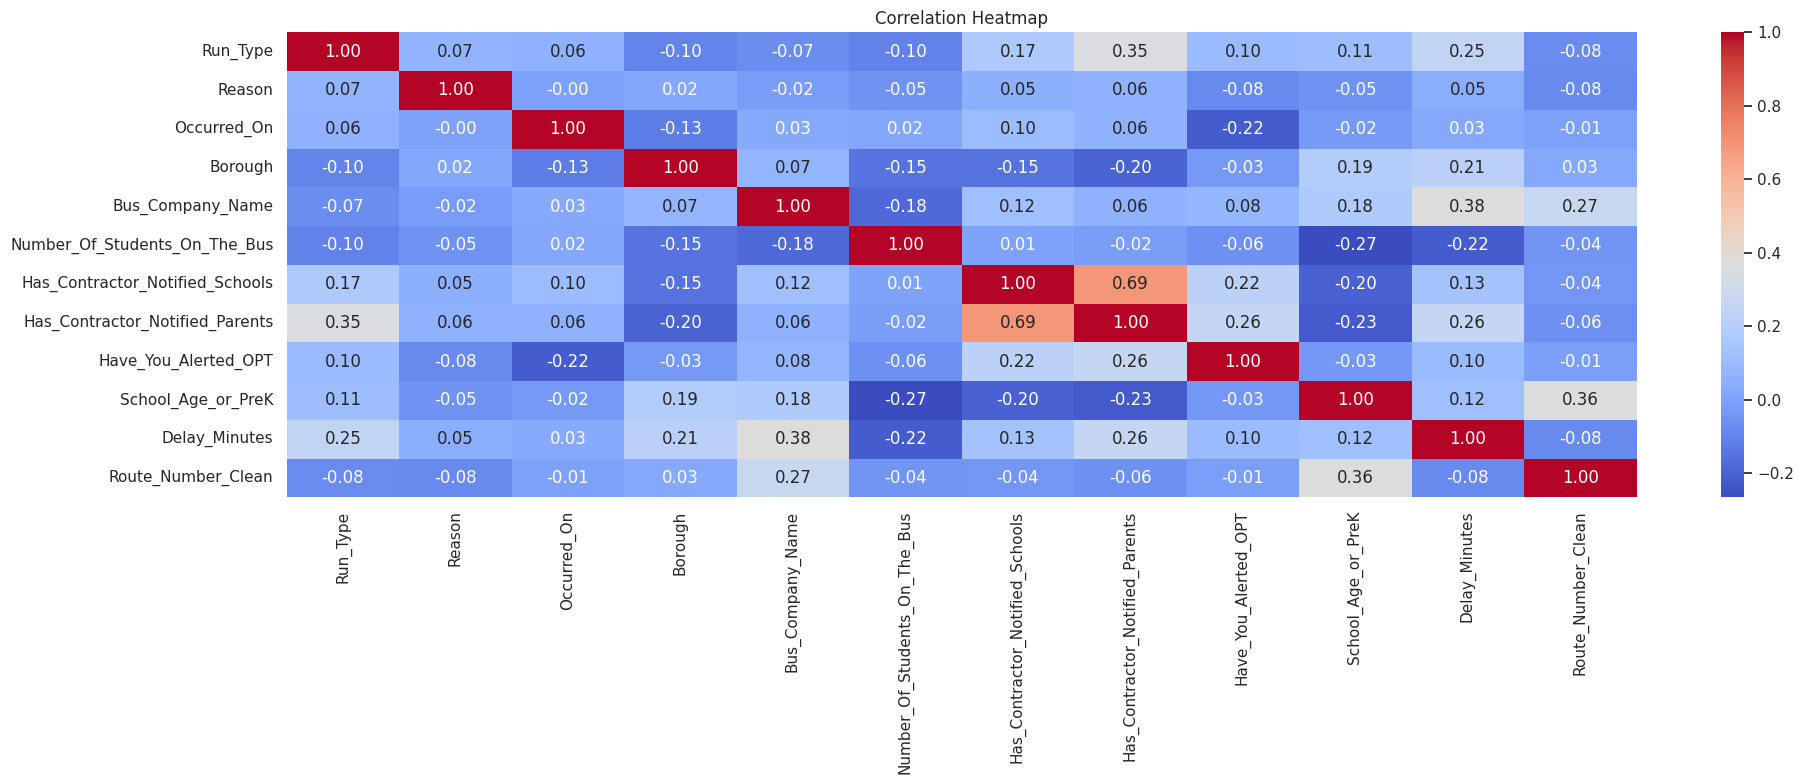

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


#Create a copy of the main DataFrame
df_encoded = df.copy()

#Exclude unwanted columns
columns_to_exclude = ['Busbreakdown_ID', 'School_Year', 'Route_Number', 'How_Long_Delayed','Breakdown_or_Running_Late']
df_encoded = df_encoded.drop(columns=columns_to_exclude, errors='ignore')

#Encode categorical columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

#Compute correlation matrix
corr_matrix = df_encoded.corr()

#Plot correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Getting a copy of the dataframe for classification modeling given we don't want re-use trained data.

#Modeling

##Modling (Regression and Classification)
Here we use random forest regressor model because it handles numerical and categorical data very well.

Root Mean Squared Error: 9.645486271595155
R2 Score: 0.8237896637242061


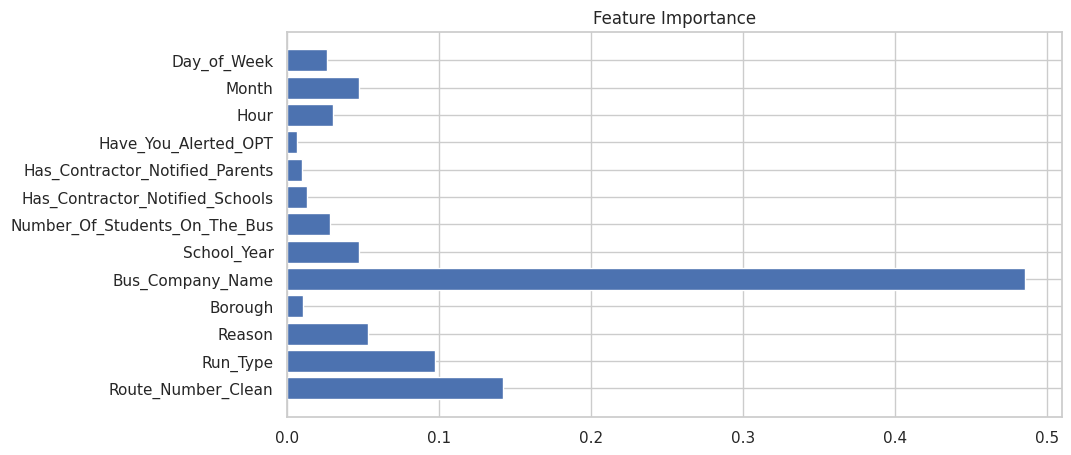

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df['Occurred_On'] = pd.to_datetime(df['Occurred_On'], errors='coerce')
df['Hour'] = df['Occurred_On'].dt.hour
df['Month'] = df['Occurred_On'].dt.month
df['Day_of_Week'] = df['Occurred_On'].dt.dayofweek

# Selected Features and Target
features = ['Route_Number_Clean', 'Run_Type', 'Reason', 'Borough', 'Bus_Company_Name',
            'School_Year', 'Number_Of_Students_On_The_Bus',
            'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
            'Have_You_Alerted_OPT', 'Hour', 'Month', 'Day_of_Week']
target = 'Delay_Minutes'

# Filter dataset
df_model = df[features + [target]].dropna(subset=[target])

df_encoded = df_model.copy()
le_dict = {}

for col in features:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        le_dict[col] = le # Store the fitted encoder

X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))

# Feature importance
plt.figure(figsize=(10,5))
plt.barh(features, model.feature_importances_)
plt.title("Feature Importance")
plt.show()

In [ ]:
df.to_csv("cleaned_dataset_for_dashboard.csv", index=False)

###XGBoost Only Model (Higher Breakdown Predictions)

In [ ]:
df1 = df.copy()

In [ ]:
%pip install category_encoders

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
from category_encoders import TargetEncoder
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# === Feature Engineering ===
df1['Occurred_On'] = pd.to_datetime(df1['Occurred_On'], errors='coerce')
df1['Hour'] = df1['Occurred_On'].dt.hour
df1['Month'] = df1['Occurred_On'].dt.month
df1['Day_of_Week'] = df1['Occurred_On'].dt.dayofweek
df1['Is_Weekend'] = df1['Day_of_Week'].isin([5, 6]).astype('int8')
df1['Is_Rush_Hour'] = df1['Hour'].isin([7, 8, 9, 15, 16, 17]).astype('int8')

df1['Contract_Notified_Schools'] = df1['Has_Contractor_Notified_Schools'].map({'Yes': 1, 'No': 0}).fillna(0).astype('int8')
df1['Contract_Notified_Parents'] = df1['Has_Contractor_Notified_Parents'].map({'Yes': 1, 'No': 0}).fillna(0).astype('int8')
df1['Alerted_OPT'] = df1['Have_You_Alerted_OPT'].map({'Yes': 1, 'No': 0}).fillna(0).astype('int8')

# Map target to numeric, preserve original labels
df1 = df1[df1['Breakdown_or_Running_Late'].isin(['Breakdown', 'Running Late'])]  # filter valid
df1['Breakdown_Binary'] = df1['Breakdown_or_Running_Late'].map({'Breakdown': 1, 'Running Late': 0}).astype('int8')
target = 'Breakdown_Binary'

# === Selected Features ===
features = [
    'School_Year', 'Number_Of_Students_On_The_Bus','Run_Type',
    'Reason','Borough', 'Hour', 'Month', 'Day_of_Week',
    'Is_Weekend', 'Is_Rush_Hour','School_Age_or_PreK',
    'Bus_Company_Name','Route_Number_Clean',
    'Contract_Notified_Schools','Contract_Notified_Parents','Alerted_OPT',
]

df1 = df1.dropna(subset=features + [target])

X = df1[features]
y = df1[target]

# === Split Data ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)


# === Target Encoding ===
cat_features = [col for col in features if df1[col].dtype == 'object']
encoder = TargetEncoder(cols=cat_features)
X_train_enc = encoder.fit_transform(X_train, y_train)
X_val_enc = encoder.transform(X_val)
X_test_enc = encoder.transform(X_test)


# === Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_val_scaled = scaler.transform(X_val_enc)
X_test_scaled = scaler.transform(X_test_enc)

# === Oversample with SMOTE ===
smote = SMOTE(sampling_strategy=0.8, random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# === Train XGBoost Model ===
model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    scale_pos_weight=(y_train_bal == 0).sum() / (y_train_bal == 1).sum(),
    evalin_metric='logloss',
    random_state=42
)
model.fit(X_train_bal, y_train_bal)

# === Validation Performance ===
y_val_pred = model.predict(X_val_scaled)
print("\nValidation Report:\n", classification_report(y_val, y_val_pred))

# === Test Set Prediction ===
y_test_pred = model.predict(X_test_scaled)
print("\nTest Report:\n", classification_report(y_test, y_test_pred))


Validation Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     43207
           1       0.73      0.79      0.76      2475

    accuracy                           0.97     45682
   macro avg       0.86      0.89      0.87     45682
weighted avg       0.97      0.97      0.97     45682


Test Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     43208
           1       0.73      0.82      0.77      2475

    accuracy                           0.97     45683
   macro avg       0.86      0.90      0.88     45683
weighted avg       0.98      0.97      0.97     45683



In [ ]:
val_report = classification_report(y_val, y_val_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

val_df = pd.DataFrame(val_report).transpose().drop('accuracy')
test_df = pd.DataFrame(test_report).transpose().drop('accuracy')

styled_val = val_df.style.background_gradient(cmap="Blues").format("{:.2f}")
styled_test = test_df.style.background_gradient(cmap="Greens").format("{:.2f}")

display(styled_val)
display(styled_test)

,precision,recall,f1-score,support
0,0.99,0.98,0.99,43207.00
1,0.73,0.79,0.76,2475.00
macro avg,0.86,0.89,0.87,45682.00
weighted avg,0.97,0.97,0.97,45682.00


,precision,recall,f1-score,support
0,0.99,0.98,0.99,43208.00
1,0.73,0.82,0.77,2475.00
macro avg,0.86,0.90,0.88,45683.00
weighted avg,0.98,0.97,0.97,45683.00


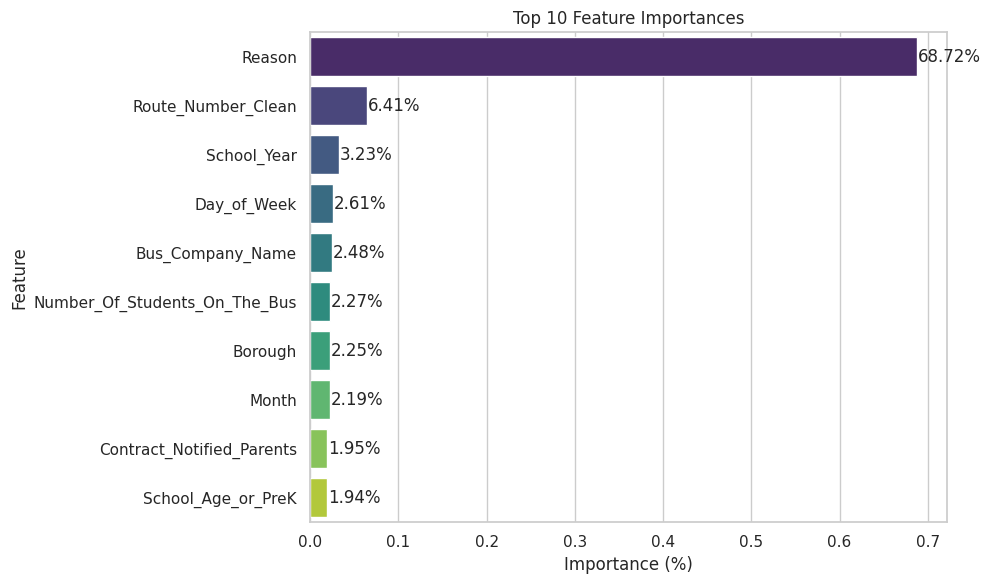

In [ ]:
# Feature importance and displaying result
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Showing the top 10 features
top_features = feature_importance.nlargest(10, 'importance').copy()
top_features.sort_values('importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='importance',
    y='feature',
    data=top_features,
    hue='feature',
    palette='viridis',
    dodge=False
)

# Add percentage labels to each bar
for i, (value, name) in enumerate(zip(top_features['importance'], top_features['feature'])):
    ax.text(value + 0.001, i, f"{value:.2%}", va='center')

plt.title('Top 10 Feature Importances')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

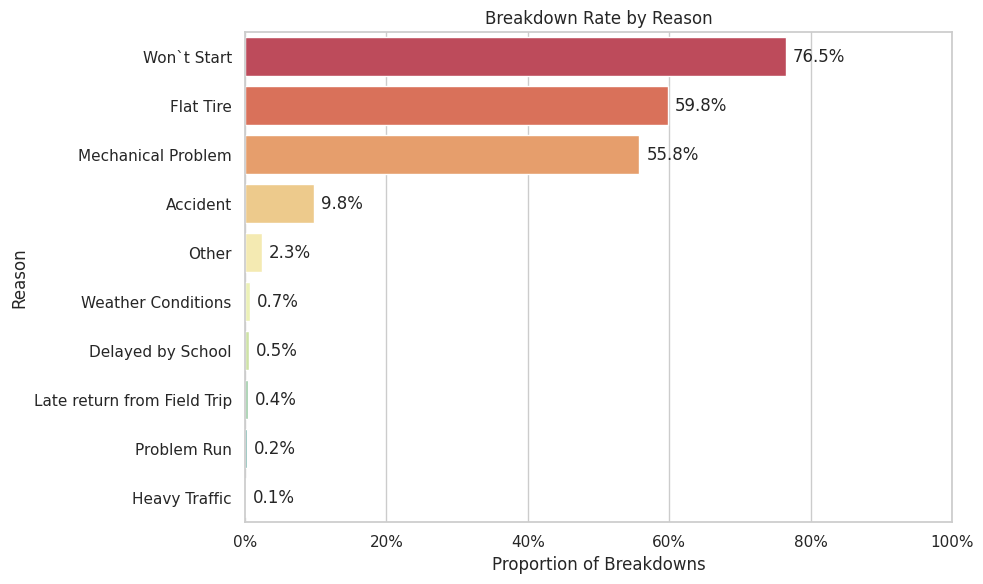

In [ ]:
#Breakdown Rate by Reason
if 'Reason' in df1.columns and 'Breakdown_or_Running_Late' in df1.columns:
    # Calculate breakdown rate per Reason
    breakdown_rate = (
        df1[df1['Breakdown_or_Running_Late'] == 'Breakdown']
        .groupby('Reason')
        .size()
    )

    # Calculate total incidents per Reason
    total_incidents = df1.groupby('Reason').size()

    # Proportion Breakdown per Reason
    breakdown_prop = (breakdown_rate / total_incidents).fillna(0).sort_values(ascending=False)

    # Plot Breakdown Rate
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=breakdown_prop.values,
        y=breakdown_prop.index,
        hue=breakdown_prop.index,
        palette=sns.color_palette('Spectral', n_colors=len(breakdown_prop))
    )
    plt.title('Breakdown Rate by Reason')
    plt.xlabel('Proportion of Breakdowns')
    plt.ylabel('Reason')
    plt.xlim(0, 1)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

    # Add percentage labels
    for i, val in enumerate(breakdown_prop.values):
        ax.text(val + 0.01, i, f"{val:.1%}", va='center')

    plt.tight_layout()
    plt.show()

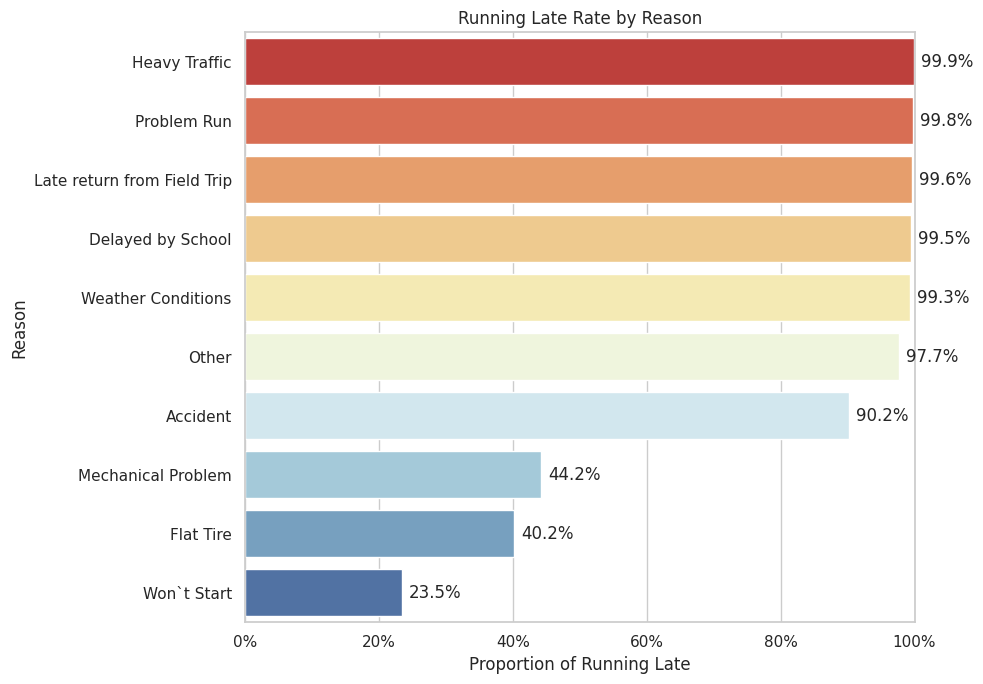

In [ ]:
#Running Late Rate by Reason
if 'Reason' in df1.columns and 'Breakdown_or_Running_Late' in df1.columns:
    # Calculate running late rate per Reason
    running_late_rate = (
        df1[df1['Breakdown_or_Running_Late'] == 'Running Late']
        .groupby('Reason')
        .size()
    )

    # Calculate total incidents per Reason
    total_incidents = df1.groupby('Reason').size()

    # Proportion Running Late per Reason
    running_late_prop = (running_late_rate / total_incidents).fillna(0).sort_values(ascending=False)

    # Plot Running Late Rate
    plt.figure(figsize=(10, 7))
    ax = sns.barplot(
        x=running_late_prop.values,
        y=running_late_prop.index,
        hue=running_late_prop.index,
        palette=sns.color_palette('RdYlBu', n_colors=len(running_late_prop))
    )
    plt.title('Running Late Rate by Reason')
    plt.xlabel('Proportion of Running Late')
    plt.ylabel('Reason')
    plt.xlim(0, 1)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

    # Add percentage labels
    for i, val in enumerate(running_late_prop.values):
        ax.text(val + 0.01, i, f"{val:.1%}", va='center')

    plt.tight_layout()
    plt.show()

In [ ]:
df1['Reason'].value_counts()

,count
Reason,
Heavy Traffic,148027
Other,41810
Mechanical Problem,13972
Problem Run,10825
Weather Conditions,3681
Late return from Field Trip,2766
Won`t Start,2416
Flat Tire,2406
Accident,1329


Getting the counts for total incidents and then by breakdown and running late to see if the model is giving us the expected results

In [ ]:
# Total reason counts
total_counts = df1['Reason'].value_counts()

# Breakdown counts
breakdown_counts = df1[df1['Breakdown_or_Running_Late'] == 'Breakdown']['Reason'].value_counts()

# Running Late counts
late_counts = df1[df1['Breakdown_or_Running_Late'] == 'Running Late']['Reason'].value_counts()

# Combine into one DataFrame
summary_df = pd.DataFrame({
    'Total': total_counts,
    'Breakdown': breakdown_counts,
    'Running Late': late_counts
}).fillna(0).astype(int)

# Sort by total in descending order
summary_df = summary_df.sort_values(by='Total', ascending=False)

summary_df

,Total,Breakdown,Running Late
Reason,,,
Heavy Traffic,148027,124,147903
Other,41810,979,40831
Mechanical Problem,13972,7790,6182
Problem Run,10825,26,10799
Weather Conditions,3681,25,3656
Late return from Field Trip,2766,10,2756
Won`t Start,2416,1848,568
Flat Tire,2406,1438,968
Accident,1329,130,1199


# Streamlit Frontend Application

In [ ]:
import joblib

# Saving model, encoder, scaler
joblib.dump(model, 'xgb_model.pkl')
joblib.dump(encoder, 'target_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
code = '''
# streamlit_app.py
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load saved artifacts
model = joblib.load('xgb_model.pkl')
encoder = joblib.load('target_encoder.pkl')
scaler = joblib.load('scaler.pkl')

st.title("🚌 Predict School Bus Delay and Breakdown")

st.markdown("Enter the following information:")

# === Input fields ===
school_year = st.selectbox("School Year", ['2024-2025', '2023-2024', '2022-2023'])
num_students = st.slider("Number of Students on the Bus", 0, 80, 25)
run_type = st.selectbox("Run Type", [
    'Pre-K/EI', 'Special Ed AM Run', 'General Ed AM Run',
    'Special Ed PM Run', 'General Ed PM Run',
    'General Ed Field Trip', 'Special Ed Field Trip'
])
reason = st.selectbox("Reason", [
    'Heavy Traffic', 'Other', 'Mechanical Problem', "Won`t Start", 'Flat Tire',
    'Problem Run', 'Accident', 'Late return from Field Trip',
    'Weather Conditions', 'Delayed by School'
])
borough = st.selectbox("Borough", ['Brooklyn', 'Bronx', 'Staten Island', 'Queens', 'Manhattan'])
hour = st.slider("Hour of Day", 0, 23, 8)
month = st.slider("Month", 1, 12, 5)
day_of_week = st.slider("Day of Week (0=Mon, 6=Sun)", 0, 6, 2)
is_weekend = int(day_of_week in [5, 6])
is_rush_hour = int(hour in [7, 8, 9, 15, 16, 17])
school_age_or_prek = st.selectbox("Student Type", ['Pre-K', 'School-Age'])

bus_company = st.selectbox("Bus Company", ['L & M BUS CORP', 'BORO TRANSIT INC',
        'PIONEER TRANSPORTATION CORP', 'PRIDE TRANSPORTATION INC',
        'ALLIED TRANSIT CORP', 'CONSOLIDATED BUS TRANSIT INC',
        'LOGAN BUS COMPANY INC', 'LITTLE RICHIE BUS SERVICE',
        'SNT BUS INC', 'DON THOMAS BUSES INC', 'Other',
        'LORINDA ENTERPRISES LTD', 'HOYT TRANSPORTATION CORP',
        'G.V.C. LTD', 'PHILLIP BUS SERVICE INC', 'VAN TRANS LLC',
        'ALL AMERICAN SCHOOL BUS COMPANY', 'EMPIRE STATE BUS CORP',
        'CAREFUL BUS SERVICE INC', 'NYC SCHOOL BUS UMBRELLA SERVICES',
        'ALINA SERVICES CORP', 'EMPIRE CHARTER SERVICE INC',
        'LEESEL TRANSPORTATION CORP', 'QUALITY TRANSPORTATION CORP'
])

# === Route number ===
route_options = [
    '3002A', 'K064', 'X184', 'R1218', 'L343', 'Q370', 'X028', 'P863',
    'Q742', 'R1203', 'M1084', 'M859', 'Q664', 'P102', 'K424', '3406A',
    'PS200', 'R349', 'L141', 'R1030', 'R1303', 'Q2901', 'M154', 'L535',
    'X2359', 'Q818', 'X049', 'M136', 'Q337', 'R1043', 'P584', 'P783',
    'L400', 'R007', 'X560', 'R1121', 'M124', 'M9045', 'M626', 'X2318',
    'X112', 'P671', 'R1324', 'R1318', 'R1078', 'K1436', 'M798', 'P677',
    'K032', 'K972', '3606A', 'X2269', 'L610', 'B0203A', 'M729', 'Q840',
    'Y136', 'X202', 'X744', 'X2138', 'N619', 'M884', 'PB4', '2B',
    'X174', 'M717', 'K1433', 'K880', 'N292', 'R1102', 'Q3082', 'L147',
    'B0230A', 'P893', 'Q121', 'R001', 'K008', 'R014', 'K1412', 'R1185',
    'R032', 'K243', 'EF4', 'B0919Z', 'R9091', 'P692', 'M111', 'K642',
    'P748', 'Q2994', 'P638', 'R9063', 'Y182', 'R9185', 'R9198',
    'R9227', 'R9316', 'R9164', 'R006', 'R023', 'L697', 'X175', 'R1068',
    'Q8375', 'M1184', 'X058', 'K012', 'M1121', 'K1429', 'Q388', 'X532',
    '3315A', '3318A', 'X631', 'M116', 'P885', 'PK1', 'Y234', 'X099',
    'Y200', 'M1036', 'K505', 'N210', 'Q906', 'K014', 'Y254', 'M783',
    'N035', 'B0221A', 'Q868', 'M956', 'K168', 'K144', 'K696', 'R9030',
    'R9043', 'R9117', 'N563', 'K981', 'X2034', '2', 'B0204A', 'R9130',
    'R9175', 'R9219', 'R1015', 'P704', 'L747', 'K109', 'Q954',
    'Other'  # allow manual entry if not in list
]

# Create searchable dropdown
route_choice = st.selectbox("Route Number (type to search or select)", route_options)

# Fallback to manual input
if route_choice == "Other":
    route_number_clean = st.text_input("Enter Route Number Manually")
else:
    route_number_clean = route_choice

contract_notified_schools = st.checkbox("Contractor Notified Schools?")
contract_notified_parents = st.checkbox("Contractor Notified Parents?")
alerted_opt = st.checkbox("Alerted OPT?")

# === Assemble feature input ===
input_dict = {
    'School_Year': school_year,
    'Number_Of_Students_On_The_Bus': num_students,
    'Run_Type': run_type,
    'Reason': reason,
    'Borough': borough,
    'Hour': hour,
    'Month': month,
    'Day_of_Week': day_of_week,
    'Is_Weekend': is_weekend,
    'Is_Rush_Hour': is_rush_hour,
    'School_Age_or_PreK': school_age_or_prek,
    'Bus_Company_Name': bus_company,
    'Route_Number_Clean': route_number_clean,
    'Contract_Notified_Schools': int(contract_notified_schools),
    'Contract_Notified_Parents': int(contract_notified_parents),
    'Alerted_OPT': int(alerted_opt)
}

input_df = pd.DataFrame([input_dict])

# === Encode, scale, and predict ===
input_encoded = encoder.transform(input_df)
input_scaled = scaler.transform(input_encoded)
proba = model.predict_proba(input_scaled)[0][1]  # Probability of Breakdown

# Determine which class has higher probability
if proba >= 0.5:
    label = "🚨 Breakdown"
    confidence = proba
else:
    label = "⏱️ Running Late"
    confidence = 1 - proba

# === Display result ===
st.markdown(f"### Prediction: **{label}**")
st.progress(float(confidence))
st.caption(f"Confidence: {confidence*100:.1f}%")'''

# Save to a .py file
with open("streamlit_app.py", "w") as f:
    f.write(code)

# This is for the PowerBI dashboard

In [ ]:
# XGBoost Predicted Probablity Values --- left are 0 values and right are the 1 values predicted
pred_prob_xgboost = model.predict_proba(X_test_scaled)


In [ ]:
# XGBoost This is just the predicted probability to the whole number
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
def Column(matrix, i):
    return [row[i] for row in matrix]

[col.item() for col in Column(pred_prob_xgboost, 0)]

[0.7197434306144714,
 0.9704111814498901,
 0.9955726861953735,
 0.9936603903770447,
 0.996846079826355,
 0.9984316229820251,
 0.9992336630821228,
 0.993788480758667,
 0.9996138215065002,
 0.9913774728775024,
 0.9965731501579285,
 0.9985576868057251,
 0.9995917677879333,
 0.5794605016708374,
 0.9914131164550781,
 0.9994685053825378,
 0.9998011589050293,
 0.9995896220207214,
 0.26557987928390503,
 0.9967285394668579,
 0.9986080527305603,
 0.9995342493057251,
 0.9929764270782471,
 0.999783456325531,
 0.9824153184890747,
 0.9944199323654175,
 0.9998732209205627,
 0.996982991695404,
 0.9896513223648071,
 0.9913176894187927,
 0.9996052980422974,
 0.9895777702331543,
 0.9990810751914978,
 0.9754767417907715,
 0.9976609349250793,
 0.9983639121055603,
 0.993459165096283,
 0.9729510545730591,
 0.9993242025375366,
 0.9983090162277222,
 0.9997623562812805,
 0.9850985407829285,
 0.9182053804397583,
 0.9680941700935364,
 0.9992411732673645,
 0.9302642345428467,
 0.9942137002944946,
 0.99799281358718

In [ ]:
output = X_test.iloc[:43210].copy()

output['XGPredict - Running Late or Breakdown'] = pd.Series(y_test_pred[:43210], index=output.index)

output['XGPredict - Probability vs Running Late'] = pd.Series(pred_prob_xgboost[:43210, 0], index=output.index)

output['XGPredict -  Classification Results: Running Late or Breakdown'] = 'Empty'
output.loc[output['XGPredict - Running Late or Breakdown'] == 1, 'XGPredict -  Classification Results: Running Late or Breakdown'] = 'Breakdown'
output.loc[output['XGPredict - Running Late or Breakdown'] == 0, 'XGPredict -  Classification Results: Running Late or Breakdown'] = 'Running Late'

output_class = output


Root Mean Squared Error: 9.645486271595155
R2 Score: 0.8237896637242061


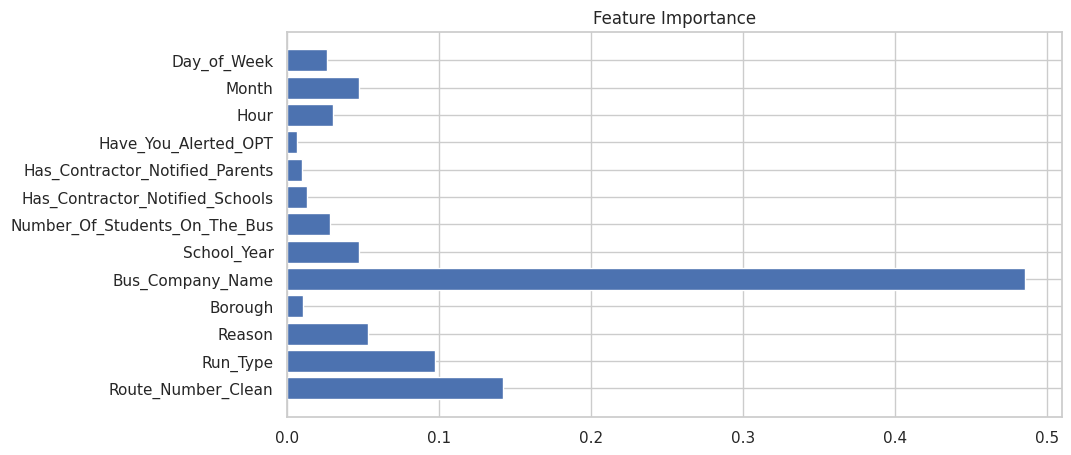

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df['Occurred_On'] = pd.to_datetime(df['Occurred_On'], errors='coerce')
df['Hour'] = df['Occurred_On'].dt.hour
df['Month'] = df['Occurred_On'].dt.month
df['Day_of_Week'] = df['Occurred_On'].dt.dayofweek

features = ['Route_Number_Clean', 'Run_Type', 'Reason', 'Borough', 'Bus_Company_Name',
            'School_Year', 'Number_Of_Students_On_The_Bus',
            'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
            'Have_You_Alerted_OPT', 'Hour', 'Month', 'Day_of_Week']
target = 'Delay_Minutes'

df_model = df[features + [target]].dropna(subset=[target])

df_encoded = df_model.copy()
le_dict = {}

for col in features:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        le_dict[col] = le

X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.barh(features, model.feature_importances_)
plt.title("Feature Importance")
plt.show()

output = X_test.copy()

output['True_Delay_Minutes'] = y_test.values
output['Predicted_Delay_Minutes'] = y_pred
output['Error'] = output['True_Delay_Minutes'] - output['Predicted_Delay_Minutes']

threshold = 3
output['Error_Type'] = 'Accurate'
output.loc[output['Error'] > threshold, 'Error_Type'] = 'Underestimated'
output.loc[output['Error'] < -threshold, 'Error_Type'] = 'Overestimated'

output.reset_index(drop=True, inplace=True)


reg_output = output


In [ ]:
output_class = output_class.reset_index(drop=True)
reg_output = reg_output.reset_index(drop=True)

combined = pd.concat([
    output_class,
    reg_output[['True_Delay_Minutes', 'Predicted_Delay_Minutes', 'Error', 'Error_Type']]
], axis=1)

combined.to_excel('combined.xlsx', index=False)


In [ ]:
combined

,School_Year,Number_Of_Students_On_The_Bus,Run_Type,Reason,Borough,Hour,Month,Day_of_Week,Is_Weekend,Is_Rush_Hour,School_Age_or_PreK,Bus_Company_Name,Route_Number_Clean,Contract_Notified_Schools,Contract_Notified_Parents,Alerted_OPT,XGPredict - Running Late or Breakdown,XGPredict - Probability vs Running Late,XGPredict - Classification Results: Running Late or Breakdown,True_Delay_Minutes,Predicted_Delay_Minutes,Error,Error_Type
0,2024-2025,0,Special Ed AM Run,Other,Manhattan,7,9,2,0,1,School-Age,L & M BUS CORP,M211,1,1,0,0,0.719743,Running Late,23.0,19.740,3.260,Underestimated
1,2023-2024,0,Special Ed AM Run,Weather Conditions,Brooklyn,7,10,0,0,1,School-Age,BORO TRANSIT INC,K226,1,0,0,0,0.970411,Running Late,75.5,75.500,0.000,Accurate
2,2024-2025,0,General Ed Field Trip,Late return from Field Trip,Brooklyn,13,5,1,0,0,School-Age,BORO TRANSIT INC,K9276,1,0,0,0,0.995573,Running Late,23.0,19.850,3.150,Underestimated
3,2022-2023,0,Special Ed AM Run,Heavy Traffic,Manhattan,6,12,2,0,0,School-Age,CONSOLIDATED BUS TRANSIT INC,M732,0,1,0,0,0.993660,Running Late,53.0,47.450,5.550,Underestimated
4,2023-2024,0,Special Ed AM Run,Heavy Traffic,Bronx,14,9,2,0,0,School-Age,DON THOMAS BUSES INC,Y216,1,1,0,0,0.996846,Running Late,38.0,38.000,0.000,Accurate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43205,2022-2023,0,General Ed PM Run,Won`t Start,Bronx,14,6,3,0,0,School-Age,QUALITY TRANSPORTATION CORP,X9781,1,1,0,1,0.039772,Breakdown,53.0,46.100,6.900,Underestimated
43206,2023-2024,0,Special Ed AM Run,Won`t Start,Brooklyn,6,6,0,0,0,School-Age,PRIDE TRANSPORTATION INC,L663,1,1,0,1,0.032714,Breakdown,38.0,36.350,1.650,Accurate
43207,2024-2025,7,General Ed AM Run,Heavy Traffic,Bronx,7,2,0,0,1,School-Age,PIONEER TRANSPORTATION CORP,X2040,1,0,0,0,0.999520,Running Late,23.0,40.845,-17.845,Overestimated
43208,2022-2023,0,Special Ed PM Run,Heavy Traffic,Queens,14,11,1,0,0,School-Age,ALLIED TRANSIT CORP,Q785,0,0,0,0,0.997572,Running Late,75.5,74.150,1.350,Accurate
